# Dynamical Systems

The idea of this notebook is to reproduce the results of:
- Maletic, S., Zhao, Y., Rajkovic, M. (2016). _Persistent topological features of dynamical systems._ Chaos, 26 5, 053105.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#!pip install ripser
from ripser import Rips

### Generate Rossler dataset

Text(0.5, 0.92, 'Rossler Attractor')

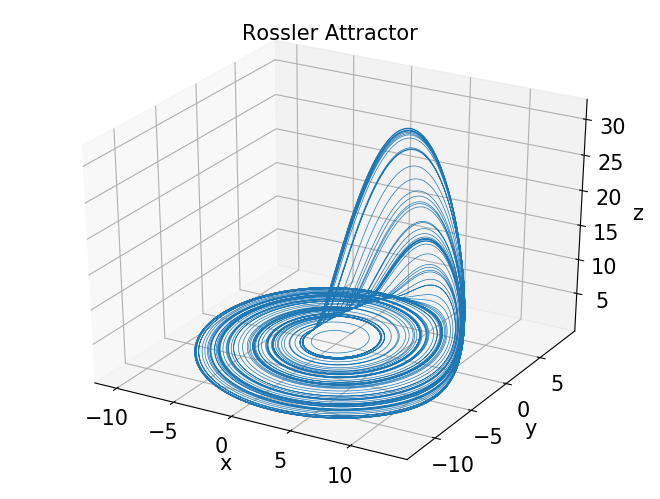

In [26]:
def Rossler(x, y, z, a=0.2, b=0.2, c=6.3):
    x_dot = -y - z
    y_dot = x + a*y
    z_dot = b + x*z - c*z
    return (x_dot, y_dot, z_dot)

dt = 0.01
step_count = 50000

xs = np.empty([step_count + 1])
ys = np.empty([step_count + 1])
zs = np.empty([step_count + 1])

# The initial conditions
xs[0], ys[0], zs[0] = (1.0, 1.0, 1.0)

# Iterate.
for i in range(step_count):
    x_dot, y_dot, z_dot = Rossler(xs[i], ys[i], zs[i])
    xs[i+1] = xs[i] + (x_dot * dt)
    ys[i+1] = ys[i] + (y_dot * dt)
    zs[i+1] = zs[i] + (z_dot * dt)

fig = plt.figure()
ax = Axes3D(fig)

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_zlabel('z', fontsize=15)
plt.tick_params(labelsize=15)
ax.set_title('Rossler Attractor', fontsize=15)

In [14]:
#Downsample data

def voxel_down_sample(data, voxel_size):
  dim = len(data[0])
  m = {} #min of the data in each dimension
  for i in range(dim):
    m[i] = data[:,i].min()
  grid_data = {}
  for x in data:
    pos = {}
    for i in range(dim):
      pos[i] = int((x[i]-m[i])/voxel_size)
    tuple_pos = tuple(pos.values())
    if tuple_pos not in grid_data.keys():
      grid_data[tuple_pos] = np.array([x])
    else:
      grid_data[tuple_pos] = np.append(grid_data[tuple_pos], [x], axis = 0)
  mean_grid_data = dict(map(lambda t: (t[0], t[1].mean(axis = 0)), grid_data.items()))
  return np.array(list(mean_grid_data.values()))

In [15]:
rossler = np.column_stack((xs, ys, zs))

In [59]:
subsampled_rossler = voxel_down_sample(rossler, 0.5)

In [60]:
print(len(rossler), len(subsampled_rossler))

50001 3026


Text(0.5, 0.92, 'Embedding Subsampled in Space')

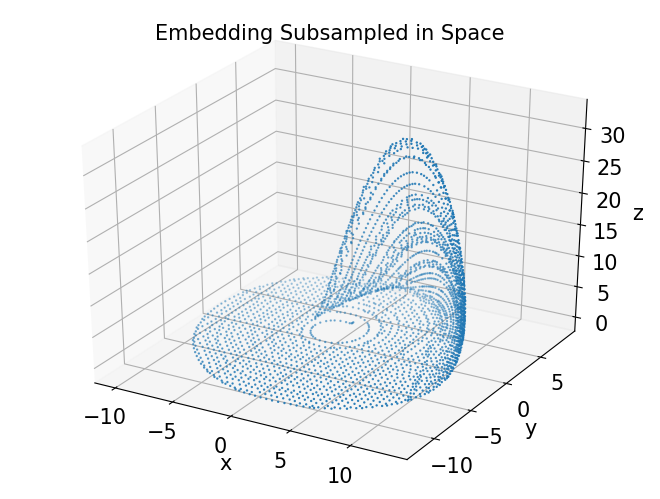

In [61]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(subsampled_rossler[:,0], subsampled_rossler[:,1], subsampled_rossler[:,2], s=0.5)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_zlabel('z', fontsize=15)
plt.tick_params(labelsize=15)
ax.set_title('Embedding Subsampled in Space', fontsize=15)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
CPU times: user 24.8 s, sys: 1.44 s, total: 26.3 s
Wall time: 25.9 s


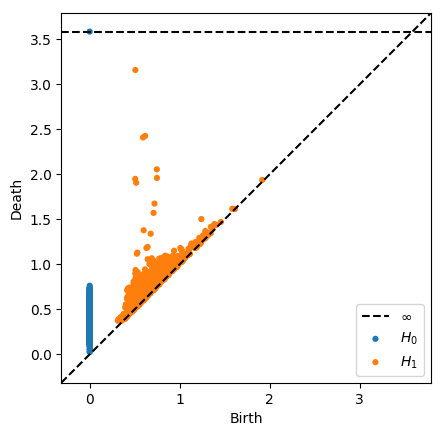

In [62]:
%%time
rips = Rips()
dgms = rips.fit_transform(subsampled_rossler)
rips.plot(dgms)


### Generate the Lorenz data set.

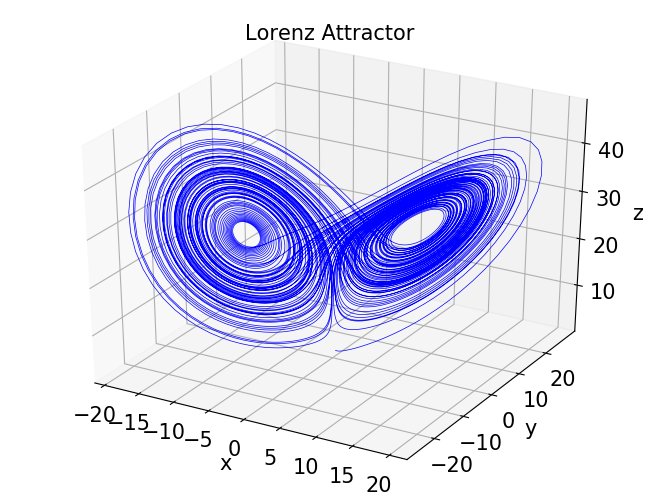

In [46]:
from scipy.integrate import odeint
# Lorenz paramters and initial conditions
sigma, beta, rho = 10, 2.667, 28
x0, y0, z0 = 0, 1, 1.05

# Maximum time point and total number of time points
tmax, n = 100, 10000

def Lorenz(X, t, sigma, beta, rho):
    """The Lorenz equations"""
    x, y, z = X
    dx = -sigma * (x - y)
    dy = rho*x - y - x*z
    dz = -beta*z + x*y
    return (dx, dy, dz)

# Integrate the Lorenz equations on the time grid t.
t = np.linspace(0, tmax, n)
f = odeint(Lorenz, (x0, y0, z0), t, args=(sigma, beta, rho))
x, y, z = f.T

# Plot the Lorenz attractor using a Matplotlib 3D projection.
fig = plt.figure()
ax = Axes3D(fig)

ax.plot(x, y, z, 'b-', lw=0.5)

ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_zlabel('z', fontsize=15)
plt.tick_params(labelsize=15)
ax.set_title('Lorenz Attractor', fontsize=15)

plt.show()

In [50]:
lorenz  = np.column_stack((x, y, z))

In [51]:
subsampled_lorenz = voxel_down_sample(lorenz, 0.5)

In [52]:
print(len(lorenz), len(subsampled_lorenz))

10000 6044


Text(0.5, 0.92, 'Embedding Subsampled in Space')

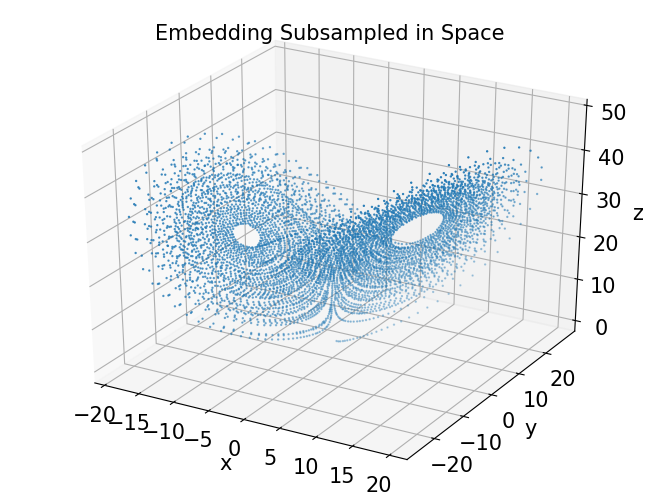

In [53]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(subsampled_lorenz[:,0], subsampled_lorenz[:,1], subsampled_lorenz[:,2], s=0.5)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_zlabel('z', fontsize=15)
plt.tick_params(labelsize=15)
ax.set_title('Embedding Subsampled in Space', fontsize=15)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
CPU times: user 2min 40s, sys: 7.33 s, total: 2min 47s
Wall time: 2min 47s


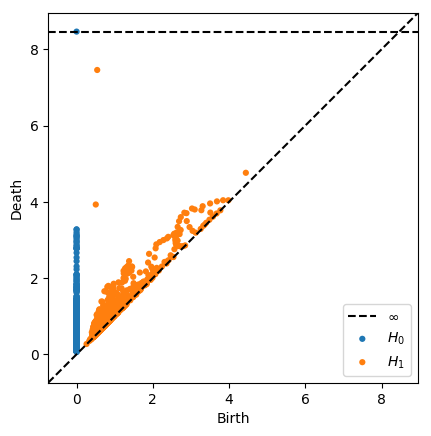

In [54]:
%%time
rips = Rips()
dgms = rips.fit_transform(subsampled_lorenz)
rips.plot(dgms)